In [1]:
# imports
%matplotlib inline
import seaborn as sns
from pyrt.data import *
from pyrt.model import *
from pyrt.tools import print_structure_info


In [2]:
# Troy Inputs
# Find work directory
cwd = '/Users/troy/Dropbox/CAP Group/TROTS/Prostate_VMAT/'
working_directory = 'outputs_troy/'
# cwd = '/media/troy/DataDrive/Dropbox/CAP Group/TROTS/Prostate_VMAT/'

# Load patient information
filename = 'Prostate_VMAT_101.mat'

imrt_model_params = {
    'target_weights':{'PTV':1000., 'default':500.},
    'oar_weights':{'Rectum':10., 'Bladder':10., 'default':1.}
}


input_dict = {
    'cwd': cwd,
    'figure_directory':working_directory,
    'filename': filename,
    'Rx': {'PTV': 79.56, 'PTV Vesicles': 72.2},
    'model_params':imrt_model_params
}



In [3]:
model = imrt_fmo(input_dict)


---------------------
|  Reading in data  |
---------------------
[ 85.  88.  89.  88.  87.  83.  79.  83.  85.  88.  88.  87.  89.  90.  88.
  85.  83.  80.  81.  86.  88.  86.  86.]
[    0.    85.   173.   262.   350.   437.   520.   599.   682.   767.
   855.   943.  1030.  1119.  1209.  1297.  1382.  1465.  1545.  1626.
  1712.  1800.  1886.  1972.]
importing PTV Dij as dense matrix, converting to sparse...
importing PTV Shell 50 mm Dij as dense matrix, converting to sparse...
importing External Ring 20 mm Dij as sparse matrix
importing PTV Shell 5 mm Dij as dense matrix, converting to sparse...
importing PTV Shell 15 mm Dij as dense matrix, converting to sparse...
importing PTV Shell 25 mm Dij as dense matrix, converting to sparse...
importing Rectum Dij as dense matrix, converting to sparse...
importing Anus Dij as dense matrix, converting to sparse...
importing Hip (L) Dij as dense matrix, converting to sparse...
importing Hip (R) Dij as dense matrix, converting to sparse...
imp

pyrt/model.py:90: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.beamlet_intensities = np.zeros(self.data.num_beamlets)
pyrt/model.py:91: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.grad = np.zeros(self.data.num_beamlets)


In [4]:
model.calc_dose_from_variables(x=np.ones(model.data.num_beamlets))
model.save_current_dose('initial_dose')

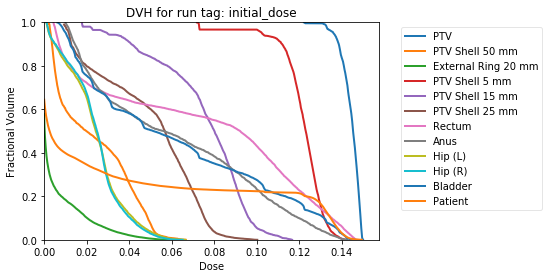

In [9]:
model.plot_DVH(run_tag='initial_dose',saveDVH=True, num_bins = 500)

In [10]:
model.run_title  = 'test_optimized'
model.optimize(display=5)


imrt model solved in 157.201630116 seconds


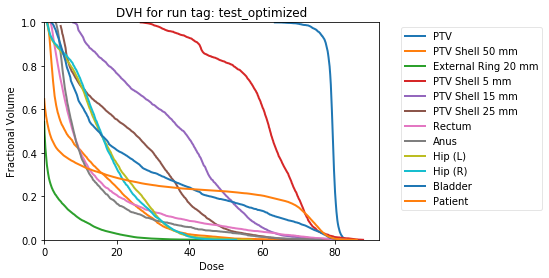

In [11]:
model.plot_DVH(run_tag='test_optimized',saveDVH=True, num_bins = 500)

In [ ]:
# seaborn plotting

In [13]:
# field reading
field_ref = model.data.f['patient/Beams/BeamConfig']
print type(field_ref)
print np.asarray(field_ref['Field'][0][0])


<class 'h5py._hl.group.Group'>
<HDF5 object reference>


In [ ]:

# for filename in os.listdir(cwd):
#     print filename
#     input_dict = {
#     'cwd': cwd,
#     'filename': filename,
#     'Rx': {'PTV': 79.56, 'PTV Vesicles': 72.2},
#     }
#     data = patient_data(input_dict)
#     print_structure_info(data)
#     print '-'*40